# Topic Modeling of Episode Descriptions

## Install required Modules

In [1]:
!pip install top2vec
!pip install scikit-learn
!pip install pandas
!pip install torch
!pip install tensorflow
!pip install bertopic
!pip install sentence-transformers
!pip install spacy
!pip install gensim
!pip install pyldavis
!pip install tf-keras

# Import Dataframe

In [2]:
import pandas as pd

PATH_TO_RAW_DATA : str = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/data/episodes_descriptions.json"
PATH_TO_CLEAN_DATA : str = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/topic_modeling/data/episodes_description.csv"
df = pd.read_csv(PATH_TO_CLEAN_DATA)
#df = pd.read_csv( PATH_TO_RAW_DATA)
df


Unnamed: 0                   title  \
0            0                   Pilot   
1            1           Lawnmower Dog   
2            2  Anatomy Park (Episode)   
3            3  M. Night Shaym-Aliens!   
4            4    Meeseeks and Destroy   
..         ...                     ...   
76          76              Mercy Kill   
77          77             Girls Night   
78          78                Kintsugi   
79          79           Little Trains   
80          80                  Heroes   

                                                 text  
0   middle night obviously drunk rick bursts morty...  
1     jerry complains family dog snuffles stupid r...  
2   christmas jerry tries enforce idea " human hol...  
3   episode opens rick dissecting large rat garage...  
4   mr meeseeks existing solve beth ’s problemafte...  
..                                                ...  
76  planet dorian 5 supernova vance slaughtering i...  
77  bar calypso diablo verde lady katana supernova...  
78  " unknown planet somber alan rails puts togeth...  
79  doom nomitron arrives destroy earth satellite ...  
80  thanks vindicators ’ manipulations prepared re...  

[81 rows x 3 columns]

## Replace Frequent Character names

In [2]:
df["text"] = df["text"].apply(lambda x: x.replace("rick" , "").replace("morty", "").replace("summer","").replace("jerry" ,"").replace("beth",""))
df

Unnamed: 0                   title  \
0            0                   Pilot   
1            1           Lawnmower Dog   
2            2  Anatomy Park (Episode)   
3            3  M. Night Shaym-Aliens!   
4            4    Meeseeks and Destroy   
..         ...                     ...   
76          76              Mercy Kill   
77          77             Girls Night   
78          78                Kintsugi   
79          79           Little Trains   
80          80                  Heroes   

                                                 text  
0   middle night obviously drunk  bursts  ’s room ...  
1      complains family dog snuffles stupid  gives...  
2   christmas  tries enforce idea " human holiday ...  
3   episode opens  dissecting large rat garage com...  
4   mr meeseeks existing solve  ’s problemafter pa...  
..                                                ...  
76  planet dorian 5 supernova vance slaughtering i...  
77  bar calypso diablo verde lady katana supernova...  
78  " unknown planet somber alan rails puts togeth...  
79  doom nomitron arrives destroy earth satellite ...  
80  thanks vindicators ’ manipulations prepared re...  

[81 rows x 3 columns]

In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy

In [3]:
import spacy
def lemmatize(docs, allowed_postags :list[str] = ["NOUN",  "ADJ", "VERB", "ADV"]) -> list:
  '''
  Performs lemmization of input documents.
  Args:
    - docs: list of strings with input documents
    - allowed_postags: list of accepted Part of Speech (POS) types
  Output:
    - list of strings with lemmatized input
  '''
  nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])
  lemmatized_docs = []
  for doc in docs:
    doc = nlp(doc)
    tokens = []
    for token in doc:
      if token.pos_ in allowed_postags:
        tokens.append(token.lemma_)
    lemmatized_docs.append(" ".join(tokens))
  return (lemmatized_docs)

In [4]:

def tokenize(docs) -> list:
  '''
  Performs tokenization of input documents.
  Args:
    - docs: list of strings with input documents
  Output:
    - list of strings with tokenized input
  '''
  tokenized_docs = []
  for doc in docs:
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    tokenized_docs.append(tokens)
  return (tokenized_docs)


In [6]:
def document_extractor (docs : list) -> list:
    output = []

    for doc in docs:
        n = 300
        [output.append(doc[i:i+n]) for i in range(0, len(doc), n)]

    return output
        

## Create episode no. Column and filter on Season 7

In [8]:
df = df.rename(columns={"Unnamed: 0" : "episode no."})
df["episode no."] = df["episode no."].apply(lambda x: int(x) + 1)
df = df[(df["episode no."] <= 71)] # Herausfiltern der Falschen
df

episode no.                               title  \
0             1                               Pilot   
1             2                       Lawnmower Dog   
2             3              Anatomy Park (Episode)   
3             4              M. Night Shaym-Aliens!   
4             5                Meeseeks and Destroy   
..          ...                                 ...   
66           67               Rickfending Your Mort   
67           68           Wet Kuat Amortican Summer   
68           69  Rise of the Numbericons: The Movie   
69           70                     Mort: Ragnarick   
70           71                        Fear No Mort   

                                                 text  
0   middle night obviously drunk rick bursts morty...  
1     jerry complains family dog snuffles stupid r...  
2   christmas jerry tries enforce idea " human hol...  
3   episode opens rick dissecting large rat garage...  
4   mr meeseeks existing solve beth ’s problemafte...  
..                                                ...  
66  morty finds rick drunken stupor floor garage s...  
67  rick ’s chores ( including cleaning another " ...  
68  episode starts exact way post credits scene " ...  
69  jerry white void golden light appear front nan...  
70    rick morty explore " carnival nightmares " t...  

[71 rows x 3 columns]

### Split Dataframes into seasons

In [9]:
seasons_splitter = [(1,11) , (12,20) , (21,30) , (31,40) , (41,50) , (51, 70)]
seasons_dfs : list[pd.DataFrame]= []

for splitter in seasons_splitter:
    seasons_dfs.append(df[(df["episode no."] >= splitter[0]) &  (df["episode no."] <= splitter[1])])

seasons_dfs[2]

episode no.                                    title  \
20           21                   The Wedding Squanchers   
21           22               The Rickshank Rickdemption   
22           23                    Rickmancing the Stone   
23           24                              Pickle Rick   
24           25  Vindicators 3: The Return of Worldender   
25           26              The Whirly Dirly Conspiracy   
26           27                    Rest and Ricklaxation   
27           28                     The Ricklantis Mixup   
28           29                     Morty's Mind Blowers   
29           30                        The ABC's of Beth   

                                                 text  
20    rick morty beth summer jerry eating breakfas...  
21  episode starts rick family sitting booth old f...  
22  jerry wearing rick morty summer fall portal ba...  
23  guess needing morty preparing school advised t...  
24  rick morty start garage cleaning multiple worm...  
25  episode begins jerry wallowing lonely new life...  
26  episode begins school morty hears jessica brok...  
27  rick morty prepare go atlantis interrupted ric...  
28  episode starts rick morty run strange humanoid...  
29  learning news convicted child murderer joseph ...

## Top2Vec (for All)

In [311]:
#docs = list(df.filter(items=[8, 9 ,10,11] , axis=0)["text"])
docs = df["text"]
docs = document_extractor(docs)
print(docs)


['middle night obviously drunk  bursts  ’s room tells " surprise " show driving newly built flying vehicle  explains made neutrino bomb : decided earth needs " fresh start " end wants destroy humanity planning start  jessica new " adam eve "  tries " take control situation " taking wheel vehicle  even', 'tually decides land vehicle says test get  act assertive passes bomb announces armed ( presumably ) activates.the next morning  falls asleep breakfast mother  concerned  ’s older sister  explains grandpa  causes argument  father law  points thinks school utter waste time ; leaving room compliments b', 'reakfast daughter  made causing cry tears joy stop angry father much husband  ’s annoyance.at school later day mr goldenfold administers math test  falls asleep sinking dream filled numbers dream quickly however evolves sexual encounter jessica asks play exposed breasts mr goldenfold unwittingly fin', 'ds receiving end  ’s subconscious fantasy later  accosted bully named frank ; appearin

2025-01-25 07:23:27.019532: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737786207.035157   54460 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737786207.040079   54460 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 07:23:27.054854: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-25 07:23:30,285 - top2vec - INFO - Pre-processing documents for training
2025-01-25 07:23:30,366 - top2vec - INFO - C

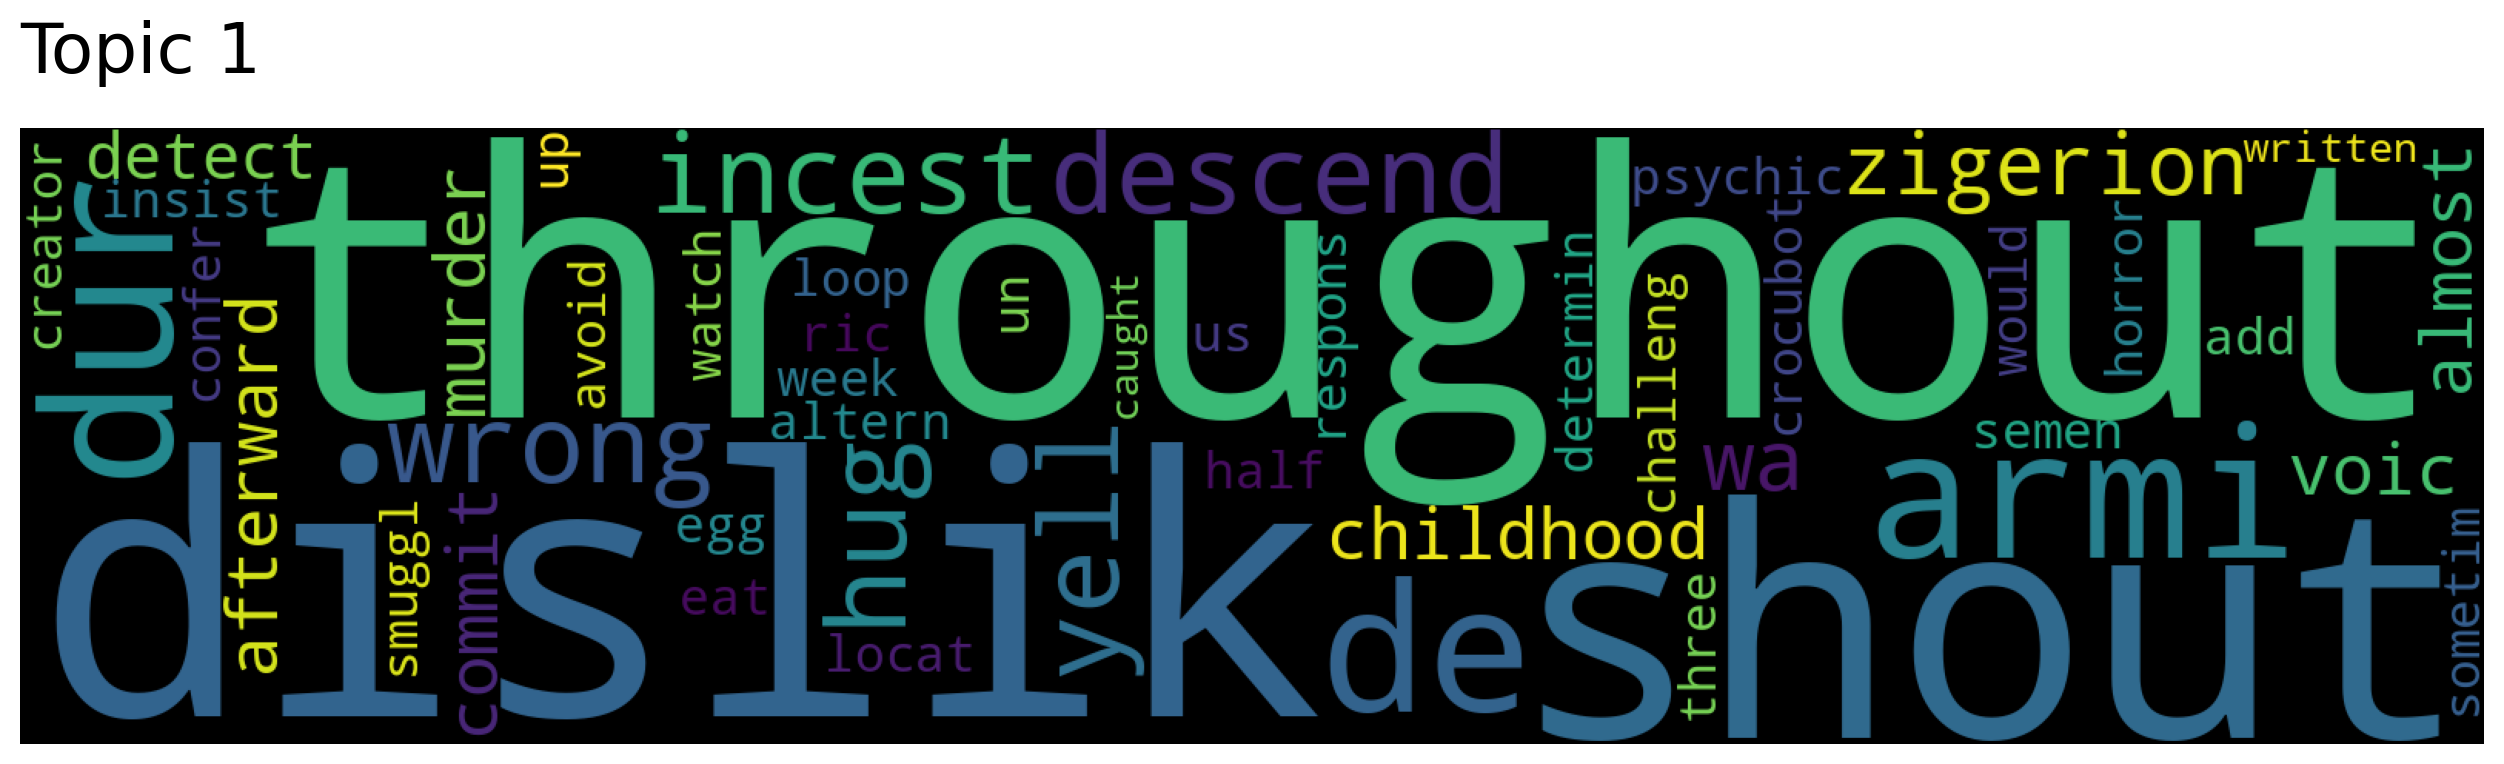

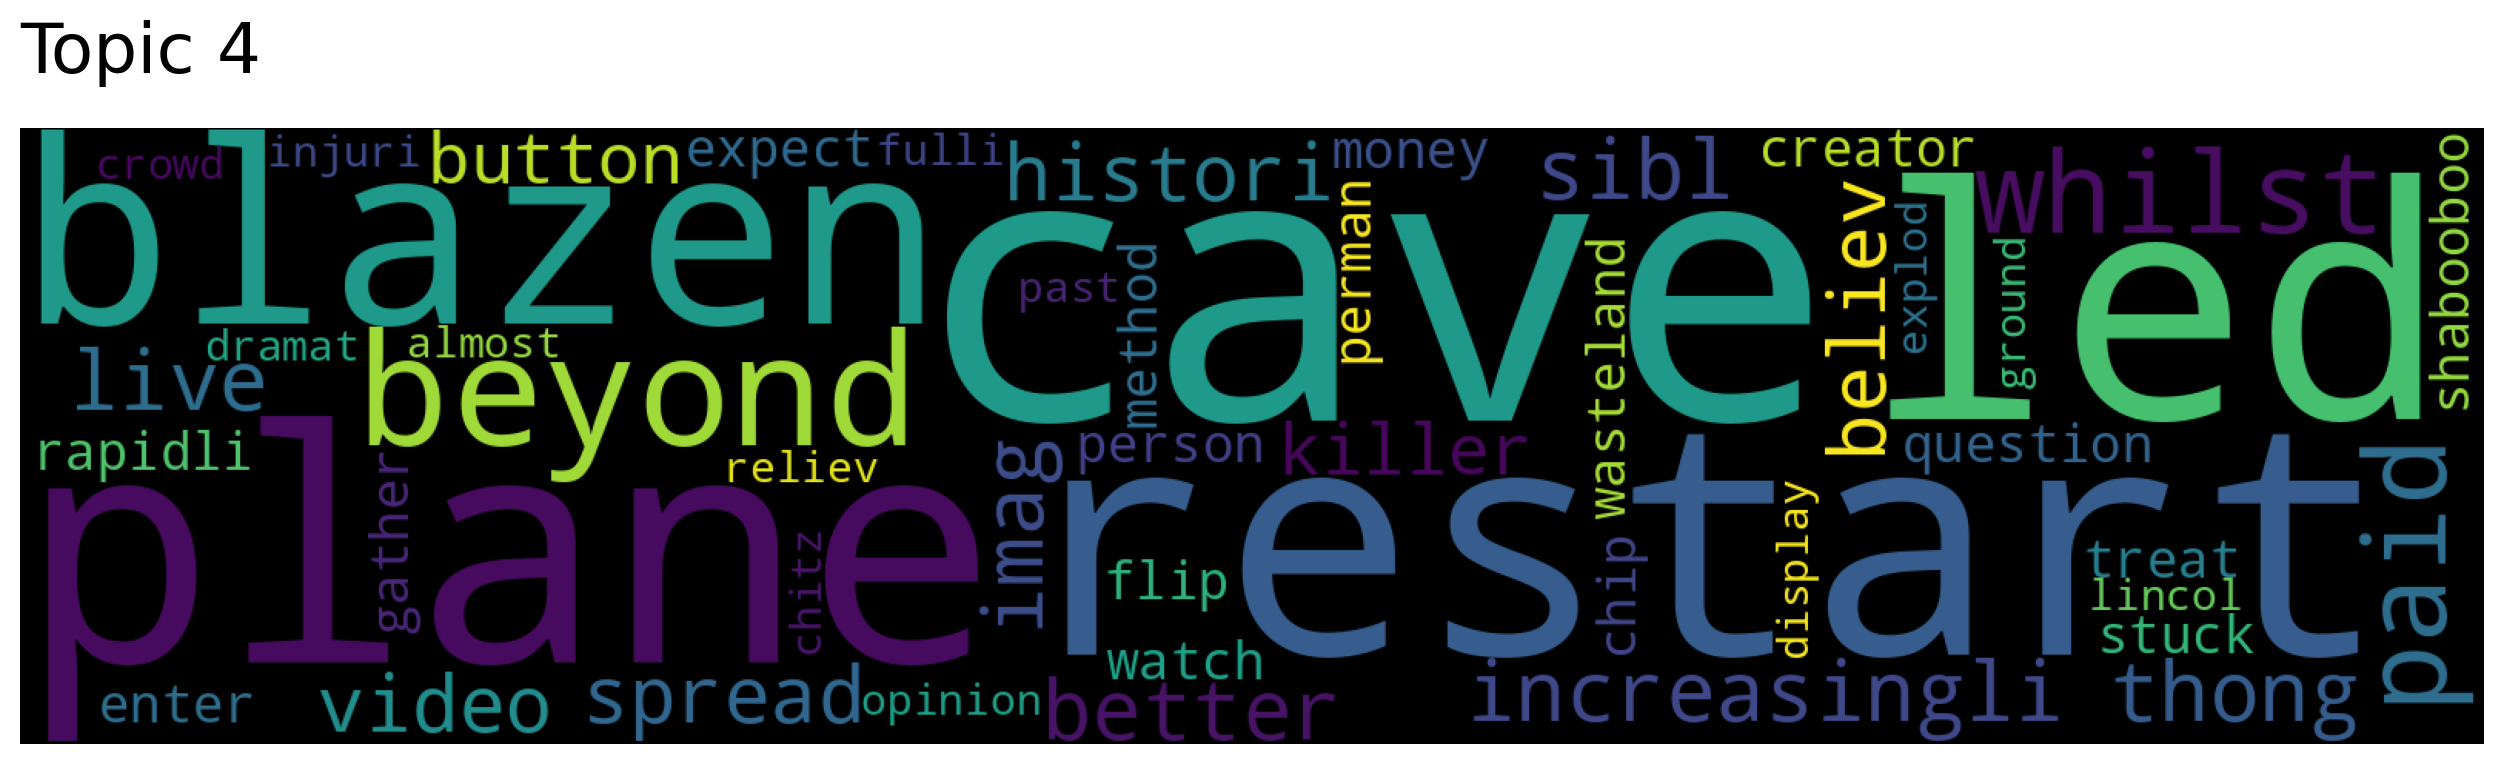

In [9]:
'''
Topic Modeling with Top2Vec: Minimum Viable Example
References:
[1] https://github.com/ddangelov/Top2Vec
[2] https://top2vec.readthedocs.io/_/downloads/en/stable/pdf/
'''
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups


#tokenize_docs = tokenize(lemmatize_docs)



# Create jointly embedded topic, document and word vectors
topic_model = Top2Vec(
  docs, 
  embedding_model = 'doc2vec', # Embedding model: See [1,2] for supported models
  min_count = 3,              # Ignore words less frequent than this value
  umap_args = None,            # Dict of custom args for UMAP
  hdbscan_args = None          # Dict of custom argd for HDBSCAN
  )

# Visualization examples: See [1,2] for more details

# Search the closest 5 topics to the input query "faith"
topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(
    keywords = ["Rick"], 
    num_topics = 2)

# Plot the resulting topics as wordclouds
for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)

In [10]:
print(topic_model.get_topics())

(array([['commerci', 'transform', 'awkwardli', 'address', 'food',
        'chastis', 'gener', 'outcom', 'gift', 'easili', 'trash', 'ry',
        'squanchy', 'awaken', 'music', 'fuse', 'simpli', 'nemesi',
        'havoc', 'face', 'stabil', 'event', 'explain', 'gone', 'theori',
        'doubt', 'hesit', 'multivers', 'prevent', 'again', 'ray',
        'hidden', 'reviv', 'rage', 'ring', 'hear', 'laser', 'staff',
        'episod', 'carri', 'chemic', 'cutter', 'close', 'continu',
        'viewer', 'lack', 'deactiv', 'cold', 'feral', 'invit'],
       ['throughout', 'dislik', 'shout', 'armi', 'dur', 'de', 'incest',
        'hug', 'descend', 'wrong', 'yell', 'zigerion', 'wa', 'childhood',
        'voic', 'almost', 'afterward', 'murder', 'commit', 'detect',
        'psychic', 'ric', 'half', 'insist', 'week', 'determin', 'eat',
        'un', 'semen', 'locat', 'altern', 'challeng', 'add', 'creator',
        'watch', 'egg', 'us', 'respons', 'crocubot', 'would', 'confer',
        'sometim', 'up', 'a

## BERTopic (for All)

2025-01-30 17:32:57.571142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738254777.586363  130607 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738254777.590848  130607 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 17:32:57.606137: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


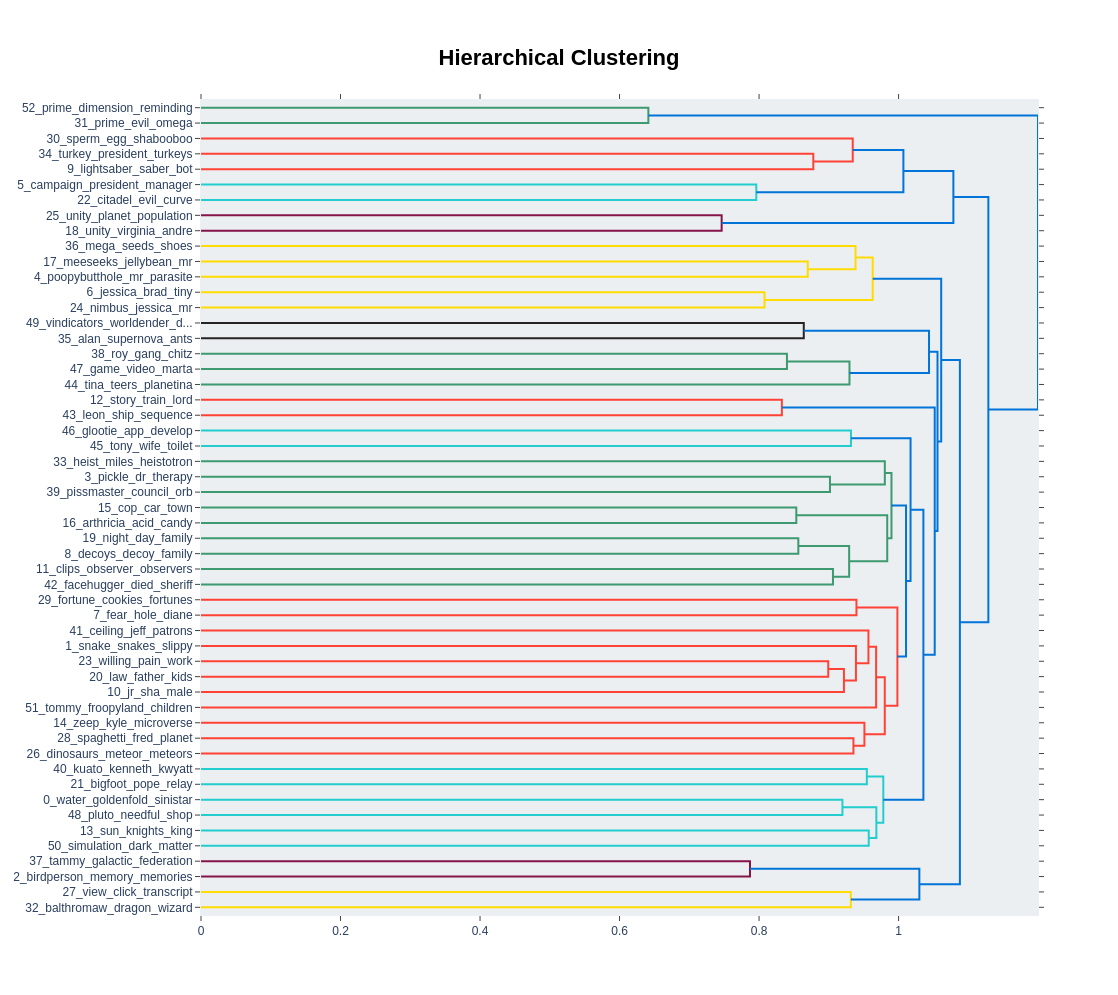

In [9]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN

docs = df["text"]
docs = document_extractor(docs)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


cluster_model = HDBSCAN(min_cluster_size = 5, 
                        metric = 'euclidean', 
                        cluster_selection_method = 'eom', 
                        prediction_data = True)


topic_model = BERTopic(embedding_model = embedding_model,
                       hdbscan_model = cluster_model)


topics, probs = topic_model.fit_transform(docs)

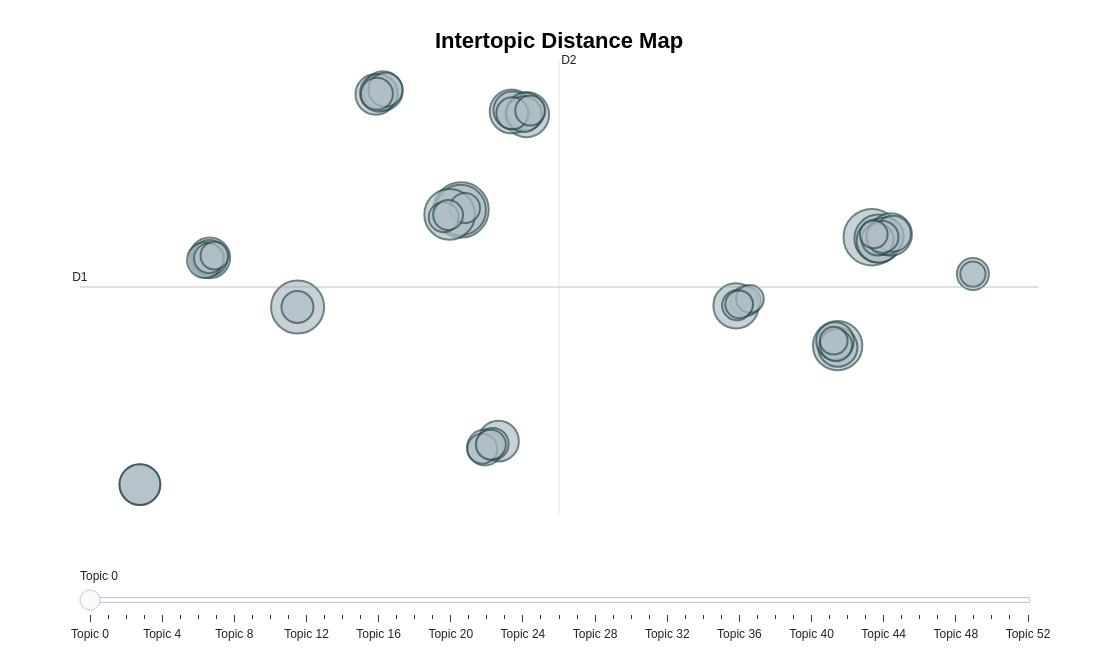

In [10]:
topic_model.visualize_topics()

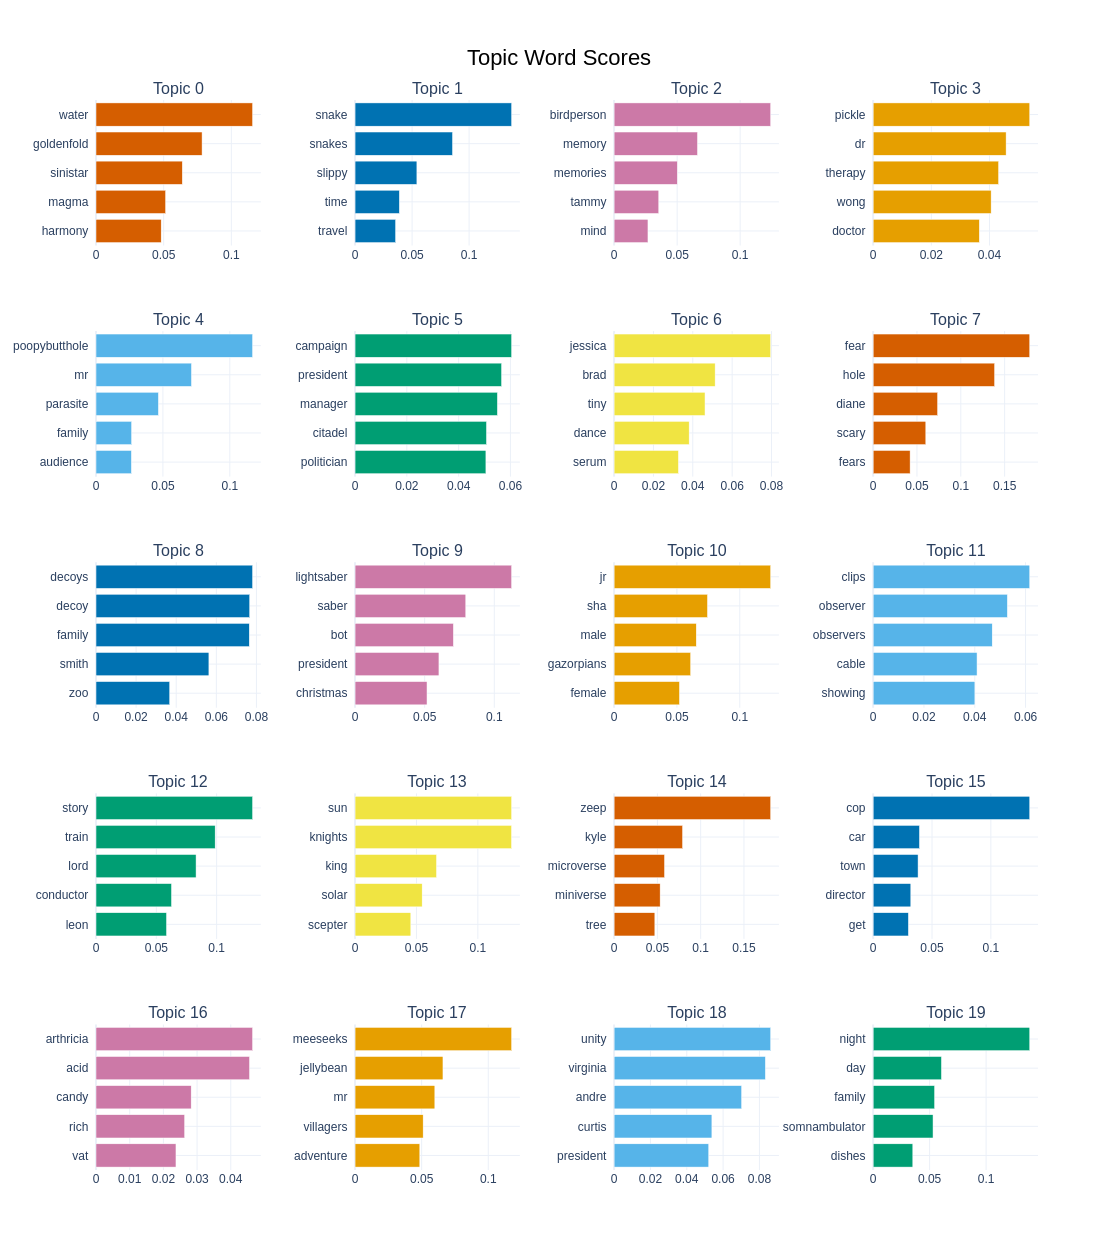

In [11]:
topic_model.visualize_barchart(top_n_topics = 20)

 ## MNF (for All)

In [18]:
'''
Topic Modeling with NMF: Minimum Viable Example
References:
[1] https://radimrehurek.com/gensim/models/nmf.html
'''

# Import dependencies
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


def lemmatize(docs, allowed_postags = ["NOUN", "ADJ"]):
  '''
  Performs lemmization of input documents.
  Args:
    - docs: list of strings with input documents
    - allowed_postags: list of accepted Part of Speech (POS) types
  Output:
    - list of strings with lemmatized input
  '''
  nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])
  lemmatized_docs = []
  for doc in docs:
    doc = nlp(doc)
    tokens = []
    for token in doc:
      if token.pos_ in allowed_postags:
        tokens.append(token.lemma_)
    lemmatized_docs.append(" ".join(tokens))
  return (lemmatized_docs)


def tokenize(docs):
  '''
  Performs tokenization of input documents.
  Args:
    - docs: list of strings with input documents
  Output:
    - list of strings with tokenized input
  '''
  tokenized_docs = []
  for doc in docs:
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    tokenized_docs.append(tokens)
  return (tokenized_docs)


# Fetch 20newsgropus dataset
docs = df["text"]

# Pre-process input: lemmatization and tokenization
lemmatized_docs = lemmatize(docs)
tokenized_docs = tokenize(lemmatized_docs)

# Mapping from word IDs to words
id2word = corpora.Dictionary(tokenized_docs)

# Prepare Document-Term Matrix
corpus = []
for doc in tokenized_docs:
    corpus.append(id2word.doc2bow(doc))

# Fit NMF model: See [1] for more details
nmf_model = gensim.models.Nmf(
    corpus = corpus,     # Document-Term Matrix
    id2word = id2word,   # Map word IDs to words
    num_topics = 10,     # Number of latent topics to extract
    random_state = 100,
    passes = 100,        # N° of passes through the corpus during training
    )

# Get the topics sorted by sparsity
nmf_model.show_topics()

[(0,
  '0.027*"unity" + 0.022*"planet" + 0.018*"summer" + 0.013*"pickl" + 0.013*"mind" + 0.010*"director" + 0.008*"session" + 0.008*"hive" + 0.007*"beta" + 0.007*"peopl"'),
 (1,
  '0.108*"snake" + 0.029*"time" + 0.027*"travel" + 0.026*"jerry" + 0.014*"planet" + 0.013*"space" + 0.011*"slippi" + 0.011*"fli" + 0.008*"room" + 0.008*"morty"'),
 (2,
  '0.131*"morty" + 0.014*"portal" + 0.011*"cop" + 0.010*"attempt" + 0.008*"campaign" + 0.007*"evil" + 0.007*"hand" + 0.007*"new" + 0.006*"politician" + 0.006*"room"'),
 (3,
  '0.020*"app" + 0.016*"toni" + 0.015*"summer" + 0.014*"jerry" + 0.012*"leader" + 0.012*"toilet" + 0.012*"plan" + 0.010*"wife" + 0.010*"room" + 0.009*"poop"'),
 (4,
  '0.084*"hole" + 0.072*"fear" + 0.048*"morty" + 0.032*"man" + 0.015*"train" + 0.013*"stori" + 0.012*"suit" + 0.012*"great" + 0.010*"next" + 0.008*"escap"'),
 (5,
  '0.037*"famili" + 0.011*"jerry" + 0.009*"decoy" + 0.008*"version" + 0.008*"hous" + 0.008*"night" + 0.007*"planet" + 0.007*"earth" + 0.007*"man" + 0.007

## LDA (for All)

In [13]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.datasets import fetch_20newsgroups
import warnings

In [14]:
corpus = []

tokenized_docs = tokenize(df["text"])
id2word = corpora.Dictionary(tokenized_docs)
for doc in tokenized_docs:
    corpus.append(id2word.doc2bow(doc))


topic_model = gensim.models.ldamodel.LdaModel(
    corpus = corpus,      # Document-Term Matrix
    id2word = id2word,    # Map word IDs to words
    num_topics = 50,      # Number of latent topics to extract
    random_state = 100,
    passes = 100,         # N° of passes through the corpus during training
    )

# Visualize with pyLDAvis: See [2] for more details
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(
    topic_model, 
    corpus,
    id2word, 
    mds = "mmds", 
    R = 30)

visualization

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
26     0.210004 -0.255340       1        1  14.128238
20     0.014083 -0.358329       2        1   6.331356
4     -0.028680 -0.290411       3        1   5.451708
16    -0.134372 -0.286528       4        1   5.187743
24     0.090616 -0.310198       5        1   4.958937
33     0.243280 -0.187792       6        1   4.466860
5     -0.207298 -0.252788       7        1   3.980061
35     0.180071 -0.301228       8        1   3.957171
46    -0.328737  0.084439       9        1   3.670359
43     0.346813 -0.092312      10        1   3.485812
3     -0.144123 -0.351148      11        1   3.473417
18    -0.243190 -0.179800      12        1   3.337165
1     -0.293338 -0.079244      13        1   2.867988
21     0.324739  0.162154      14        1   2.846066
22    -0.323646 -0.136526      15        1   2.432157
2     -0.269670  0.256682      16        1   2.247660
29    -0.321785  0.030991      17        1   2.239757
7      0.319882  0.041976      18        1   2.213396
44    -0.265745 -0.025896      19        1   2.185182
30     0.133490 -0.211850      20        1   2.181081
17    -0.172784 -0.131080      21        1   1.804642
45     0.035365 -0.213116      22        1   1.561424
28     0.246156  0.002991      23        1   1.411747
49    -0.059185 -0.146787      24        1   1.380117
25     0.099734  0.254005      25        1   1.286470
10     0.281378 -0.068211      26        1   1.244318
23    -0.129646  0.315598      27        1   1.243620
9      0.074740  0.331122      28        1   1.171329
15    -0.224691  0.143786      29        1   1.154974
19    -0.165848  0.207503      30        1   1.085351
14    -0.029830  0.337401      31        1   1.065263
13     0.158866 -0.060966      32        1   1.038198
37     0.196948  0.188481      33        1   0.835054
48     0.185011  0.118444      34        1   0.691180
47     0.146736  0.237988      35        1   0.599233
34    -0.001942  0.203991      36        1   0.404727
36    -0.071303  0.101290      37        1   0.302398
12     0.012440  0.079074      38        1   0.028627
31     0.009622  0.070136      39        1   0.004101
6      0.009622  0.070136      40        1   0.004101
8      0.009622  0.070136      41        1   0.004101
27     0.009622  0.070136      42        1   0.004101
41     0.009622  0.070136      43        1   0.004101
42     0.009622  0.070136      44        1   0.004101
40     0.009622  0.070136      45        1   0.004101
39     0.009622  0.070136      46        1   0.004101
38     0.009622  0.070136      47        1   0.004101
32     0.009622  0.070136      48        1   0.004101
11     0.009622  0.070136      49        1   0.004101
0      0.009622  0.070136      50        1   0.004101, topic_info=             Term        Freq       Total Category  logprob  loglift
253            mr   99.000000   99.000000  Default  30.0000  30.0000
486        family  175.000000  175.000000  Default  29.0000  29.0000
2791    president   93.000000   93.000000  Default  28.0000  28.0000
2800        snake   54.000000   54.000000  Default  27.0000  27.0000
406          time  151.000000  151.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
4        addition    0.000188    2.308230  Topic50  -8.9368   0.6835
5     administers    0.000188    2.443991  Topic50  -8.9368   0.6263
6      adventures    0.000188   22.264272  Topic50  -8.9368  -1.5830
7      aggravated    0.000188    1.594167  Topic50  -8.9368   1.0536
8           aging    0.000188    2.512444  Topic50  -8.9368   0.5987

[3037 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1206      6  0.589923   abandoned
1206     13  0.393282   abandoned
6393     19  0.699439  abandoning
2992     34  0.826950    abandons
1525      4  0.150285     ability
...     ...       ...         ...
911      33

In [15]:
topic_model.print_topics(num_topics=50)

[(0,
  '0.000*"time" + 0.000*"device" + 0.000*"one" + 0.000*"evil" + 0.000*"back" + 0.000*"prime" + 0.000*"portal" + 0.000*"citadel" + 0.000*"go" + 0.000*"make"'),
 (1,
  '0.020*"dimension" + 0.015*"prime" + 0.012*"family" + 0.009*"back" + 0.007*"space" + 0.006*"new" + 0.006*"however" + 0.006*"killed" + 0.005*"reggie" + 0.005*"revenge"'),
 (2,
  '0.032*"cop" + 0.013*"campaign" + 0.013*"manager" + 0.012*"portal" + 0.012*"politician" + 0.010*"citadel" + 0.009*"new" + 0.009*"town" + 0.009*"left" + 0.008*"president"'),
 (3,
  '0.043*"snake" + 0.038*"time" + 0.021*"snakes" + 0.011*"slippy" + 0.010*"travel" + 0.009*"back" + 0.008*"planet" + 0.008*"one" + 0.007*"two" + 0.007*"deer"'),
 (4,
  '0.017*"birdperson" + 0.012*"president" + 0.011*"turkey" + 0.011*"memory" + 0.006*"two" + 0.006*"alien" + 0.005*"pibbles" + 0.004*"family" + 0.004*"turkeys" + 0.004*"tells"'),
 (5,
  '0.025*"fear" + 0.024*"hole" + 0.015*"unity" + 0.014*"night" + 0.013*"family" + 0.011*"diane" + 0.009*"day" + 0.007*"one" +

In [294]:
df

episode no.                               title  \
0             3                               Pilot   
1             4                       Lawnmower Dog   
2             5              Anatomy Park (Episode)   
3             6              M. Night Shaym-Aliens!   
4             7                Meeseeks and Destroy   
..          ...                                 ...   
64           67                       That's Amorte   
65           68                        Unmortricken   
66           69               Rickfending Your Mort   
67           70           Wet Kuat Amortican Summer   
68           71  Rise of the Numbericons: The Movie   

                                                 text  
0   middle night obviously drunk  bursts  ’s room ...  
1      complains family dog snuffles stupid  gives...  
2   christmas  tries enforce idea " human holiday ...  
3   episode opens  dissecting large rat garage com...  
4   mr meeseeks existing solve  ’s problemafter pa...  
..                                                ...  
64   holding spaghetti.the smith family enjoys bow...  
65  extended flashback evil  ’s past shown : initi...  
66   finds  drunken stupor floor garage still depr...  
67   ’s chores ( including cleaning another "  ’s ...  
68  episode starts exact way post credits scene " ...  

[69 rows x 3 columns]

In [16]:
def logging_topic_relevance_per_episode(topic_id : int)-> list[float]:
    values = []
    for i in range(df.shape[0]):
        other_texts = tokenize( df[(df["episode no."] == i + 1)]["text"])
        other_corpus = [id2word.doc2bow(text) for text in other_texts]
        values.append(topic_model.get_document_topics(bow=other_corpus , minimum_probability=0.0 ,per_word_topics=True)[0][0][topic_id][1])
    return values

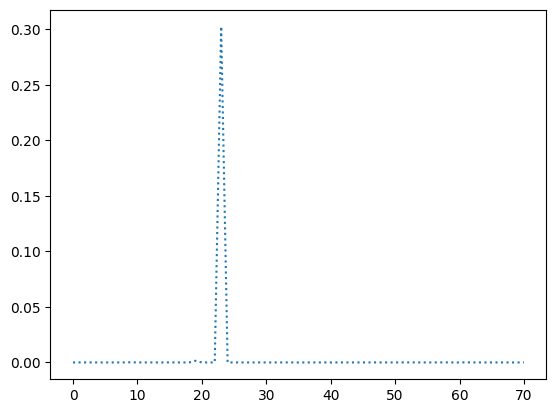

In [37]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array(logging_topic_relevance_per_episode(47))

plt.plot(ypoints, linestyle = 'dotted')
plt.show()

In [229]:
topic_model.get_topic_terms(25 , topn=20)

[(5084, 0.00013104443),
 (5075, 0.00013104443),
 (5071, 0.00013104443),
 (5073, 0.00013104443),
 (5083, 0.00013104443),
 (5097, 0.00013104443),
 (5085, 0.00013104443),
 (5086, 0.00013104443),
 (5087, 0.00013104443),
 (5088, 0.00013104443),
 (5089, 0.00013104443),
 (5090, 0.00013104443),
 (5091, 0.00013104443),
 (5092, 0.00013104443),
 (5093, 0.00013104443),
 (5094, 0.00013104443),
 (5095, 0.00013104443),
 (5082, 0.00013104443),
 (5072, 0.00013104443),
 (5076, 0.00013104443)]

In [237]:
id2word[5076]

'sugar'

# LDA Per Season

In [319]:
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

seasons_dfs


[    episode no.                                 title  \
 0             1                                 Pilot   
 1             2                         Lawnmower Dog   
 2             3                Anatomy Park (Episode)   
 3             4                M. Night Shaym-Aliens!   
 4             5                  Meeseeks and Destroy   
 5             6                         Rick Potion 9   
 6             7                   Raising Gazorpazorp   
 7             8                         Rixty Minutes   
 8             9       Something Ricked This Way Comes   
 9            10  Close Rick-Counters of the Rick Kind   
 10           11                       Ricksy Business   
 
                                                  text  
 0   middle night obviously drunk  bursts  ’s room ...  
 1      complains family dog snuffles stupid  gives...  
 2   christmas  tries enforce idea " human holiday ...  
 3   episode opens  dissecting large rat garage com...  
 4   mr meeseeks 

In [30]:
vizualisations :list = []

for season_df in seasons_dfs:
    tokenized_docs =  tokenize(season_df["text"])
    id2word = corpora.Dictionary(tokenized_docs)
    corpus = []
    for doc in tokenized_docs:
        corpus.append(id2word.doc2bow(doc))
    
    # Fit LDA model: See [1] for more details
    topic_model = gensim.models.ldamodel.LdaModel(
        corpus = corpus,      # Document-Term Matrix
        id2word = id2word,    # Map word IDs to words
        num_topics = 25,      # Number of latent topics to extract
        random_state = 100,
        passes = 100,         # N° of passes through the corpus during training
        )
    
    # Visualize with pyLDAvis: See [2] for more details
    pyLDAvis.enable_notebook()
    visualization = pyLDAvis.gensim_models.prepare(
        topic_model, 
        corpus,
        id2word, 
        mds = "mmds", 
        R = 30)
    
    vizualisations.append(visualization)

ValueError: cannot compute LDA over an empty collection (no terms)

In [31]:
len(vizualisations)

5

In [48]:
vizualisations[0]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.085022 -0.255072       1        1  23.031317
17     0.122310  0.252483       2        1  22.364588
14    -0.223825 -0.114791       3        1  21.814667
18    -0.301807 -0.006399       4        1  12.394426
13    -0.223329  0.170958       5        1   8.056829
0     -0.082663  0.261069       6        1   5.980256
20     0.151767 -0.251148       7        1   5.885164
2      0.089926 -0.006910       8        1   0.330892
23     0.032508 -0.002952       9        1   0.008345
22     0.032508 -0.002952      10        1   0.008345
21     0.032508 -0.002952      11        1   0.008345
19     0.032508 -0.002952      12        1   0.008345
16     0.032508 -0.002952      13        1   0.008345
15     0.032508 -0.002952      14        1   0.008345
12     0.032508 -0.002952      15        1   0.008345
1      0.032508 -0.002952      16        1   0.008345
10     0.032508 -0.002952      17        1   0.008345
9      0.032508 -0.002952      18        1   0.008345
8      0.032508 -0.002952      19        1   0.008345
7      0.032508 -0.002952      20        1   0.008345
6      0.032508 -0.002952      21        1   0.008345
5      0.032508 -0.002952      22        1   0.008345
4      0.032508 -0.002952      23        1   0.008345
3      0.032508 -0.002952      24        1   0.008345
24     0.032508 -0.002952      25        1   0.008345, topic_info=          Term       Freq      Total Category  logprob  loglift
232         mr  34.000000  34.000000  Default  30.0000  30.0000
929   meeseeks  21.000000  21.000000  Default  29.0000  29.0000
1378        jr  18.000000  18.000000  Default  28.0000  28.0000
356     summer  45.000000  45.000000  Default  27.0000  27.0000
195      jerry  89.000000  89.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
360       take   0.000251  19.688600  Topic25  -7.4674  -1.8799
381        tri   0.000251  22.172763  Topic25  -7.4674  -1.9987
390        use   0.000251  14.070363  Topic25  -7.4674  -1.5439
1265      viru   0.000251   6.849992  Topic25  -7.4674  -0.8241
0       accost   0.000251   1.204340  Topic25  -7.4674   0.9142

[1492 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1659      2  0.931800  abrodolph
1535      5  0.894241       abus
1536      5  0.894241      accid
0         1  0.830331     accost
1459      6  0.927893     achiev
...     ...       ...        ...
407       3  0.606974      world
407       6  0.202325      world
409       1  0.824508       yell
409       6  0.206127       yell
804       1  0.991265   zigerion

[783 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 18, 15, 19, 14, 1, 21, 3, 24, 23, 22, 20, 17, 16, 13, 2, 11, 10, 9, 8, 7, 6, 5, 4, 25])

In [49]:
vizualisations[1]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.028381  0.274670       1        1  26.112204
24     0.252878 -0.124642       2        1  19.702443
17    -0.262458 -0.110807       3        1  12.545200
2      0.311013  0.120084       4        1  12.177347
18    -0.289004  0.100526       5        1  12.038476
19    -0.116390 -0.255043       6        1   9.158178
7      0.104903 -0.295647       7        1   7.669748
21    -0.031404  0.078146       8        1   0.480440
14     0.000122  0.012512       9        1   0.006821
23     0.000122  0.012512      10        1   0.006821
22     0.000122  0.012512      11        1   0.006821
20     0.000122  0.012512      12        1   0.006821
16     0.000122  0.012512      13        1   0.006821
15     0.000122  0.012512      14        1   0.006821
0      0.000122  0.012512      15        1   0.006821
13     0.000122  0.012512      16        1   0.006821
11     0.000122  0.012512      17        1   0.006821
10     0.000122  0.012512      18        1   0.006821
9      0.000122  0.012512      19        1   0.006821
8      0.000122  0.012512      20        1   0.006821
6      0.000122  0.012512      21        1   0.006821
5      0.000122  0.012512      22        1   0.006821
4      0.000122  0.012512      23        1   0.006821
3      0.000122  0.012512      24        1   0.006821
12     0.000122  0.012512      25        1   0.006821, topic_info=        Term       Freq      Total Category  logprob  loglift
161    jerry  84.000000  84.000000  Default  30.0000  30.0000
1236    zeep  28.000000  28.000000  Default  29.0000  29.0000
309     time  35.000000  35.000000  Default  28.0000  28.0000
27      beth  60.000000  60.000000  Default  27.0000  27.0000
668    unity  20.000000  20.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
21       beg   0.000201   2.060002  Topic25  -7.4883   0.3582
22     begin   0.000201  20.394156  Topic25  -7.4883  -1.9343
23    behind   0.000201   8.204558  Topic25  -7.4883  -1.0238
24    belong   0.000201   2.963295  Topic25  -7.4883  -0.0054
25    benson   0.000201   2.061681  Topic25  -7.4883   0.3574

[1476 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
468       2  0.262476       abl
468       6  0.787428       abl
0         5  0.859291    accept
1         2  0.616592  accident
1         4  0.205531  accident
...     ...       ...       ...
1362      7  0.896950      worm
1363      7  0.896950     worri
1365      7  1.066496   younger
931       2  0.999328      zani
1236      4  0.994797      zeep

[734 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 25, 18, 3, 19, 20, 8, 22, 15, 24, 23, 21, 17, 16, 1, 14, 12, 11, 10, 9, 7, 6, 5, 4, 13])

In [50]:
vizualisations[2]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
24    -0.027716  0.191428       1        1  50.447499
4     -0.287418  0.015964       2        1  17.230398
16    -0.189785  0.234747       3        1   8.535247
15     0.163431  0.246501       4        1   8.133518
3     -0.119369 -0.282090       5        1   8.071714
17     0.375021 -0.047554       6        1   7.464371
14     0.004518 -0.018894       7        1   0.006171
23     0.004518 -0.018894       8        1   0.006171
22     0.004518 -0.018894       9        1   0.006171
21     0.004518 -0.018894      10        1   0.006171
20     0.004518 -0.018894      11        1   0.006171
19     0.004518 -0.018894      12        1   0.006171
18     0.004518 -0.018894      13        1   0.006171
0      0.004518 -0.018894      14        1   0.006171
13     0.004518 -0.018894      15        1   0.006171
1      0.004518 -0.018894      16        1   0.006171
11     0.004518 -0.018894      17        1   0.006171
10     0.004518 -0.018894      18        1   0.006171
9      0.004518 -0.018894      19        1   0.006171
8      0.004518 -0.018894      20        1   0.006171
7      0.004518 -0.018894      21        1   0.006171
6      0.004518 -0.018894      22        1   0.006171
5      0.004518 -0.018894      23        1   0.006171
2      0.004518 -0.018894      24        1   0.006171
12     0.004518 -0.018894      25        1   0.006171, topic_info=       Term        Freq       Total Category  logprob  loglift
207   morty  230.000000  230.000000  Default  30.0000  30.0000
275    rick  368.000000  368.000000  Default  29.0000  29.0000
309  summer   61.000000   61.000000  Default  28.0000  28.0000
33     beth   73.000000   73.000000  Default  27.0000  27.0000
166   jerry   78.000000   78.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
187    look    0.000203   15.018101  Topic25  -7.5868  -1.5208
193    make    0.000203   20.569851  Topic25  -7.5868  -1.8354
224  outsid    0.000203   10.686868  Topic25  -7.5868  -1.1806
234   peopl    0.000203   11.606197  Topic25  -7.5868  -1.2631
241  planet    0.000203   10.535746  Topic25  -7.5868  -1.1663

[1509 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.970996   abandon
1405      5  0.919978      abil
1         1  0.837770       abl
592       4  0.919243    absenc
2         1  0.747729  accident
...     ...       ...       ...
358       2  0.351015     would
358       3  0.058502     would
358       4  0.117005     would
358       5  0.058502     would
1403      2  1.013703        xe

[681 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[25, 5, 17, 16, 4, 18, 15, 24, 23, 22, 21, 20, 19, 1, 14, 2, 12, 11, 10, 9, 8, 7, 6, 3, 13])

In [51]:
vizualisations[3]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.062662 -0.191014       1        1  42.569090
6      0.147647  0.244212       2        1  16.084069
3     -0.287214 -0.018501       3        1  10.384081
11    -0.231068 -0.168970       4        1   7.561030
1     -0.230898  0.149215       5        1   6.408023
7     -0.093174  0.279935       6        1   6.238478
2      0.072215 -0.270910       7        1   5.822033
16     0.258301 -0.146152       8        1   4.833990
0      0.025109  0.007187       9        1   0.005836
23     0.025109  0.007187      10        1   0.005836
22     0.025109  0.007187      11        1   0.005836
21     0.025109  0.007187      12        1   0.005836
20     0.025109  0.007187      13        1   0.005836
19     0.025109  0.007187      14        1   0.005836
18     0.025109  0.007187      15        1   0.005836
17     0.025109  0.007187      16        1   0.005836
12     0.025109  0.007187      17        1   0.005836
15     0.025109  0.007187      18        1   0.005836
14     0.025109  0.007187      19        1   0.005836
13     0.025109  0.007187      20        1   0.005836
10     0.025109  0.007187      21        1   0.005836
9      0.025109  0.007187      22        1   0.005836
5      0.025109  0.007187      23        1   0.005836
4      0.025109  0.007187      24        1   0.005836
24     0.025109  0.007187      25        1   0.005836, topic_info=          Term        Freq       Total Category  logprob  loglift
1636     snake   80.000000   80.000000  Default  30.0000  30.0000
216       rick  308.000000  308.000000  Default  29.0000  29.0000
143      jerry   98.000000   98.000000  Default  28.0000  28.0000
167      morty  189.000000  189.000000  Default  27.0000  27.0000
531        app   25.000000   25.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
13     america    0.000187    1.116755  Topic25  -7.6639   1.0567
14       annoy    0.000187    4.763989  Topic25  -7.6639  -0.3940
15       anoth    0.000187   14.175327  Topic25  -7.6639  -1.4844
16    argument    0.000187    3.035128  Topic25  -7.6639   0.0569
17      arrest    0.000187    1.939520  Topic25  -7.6639   0.5047

[1530 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         5  0.895452     abil
1847      7  0.906332    about
1         4  0.506467   accept
1         5  0.506467   accept
1700      2  0.098690     acid
...     ...       ...      ...
284       1  0.495898    would
284       3  0.247949    would
284       5  0.082650    would
284       7  0.247949    would
1232      6  1.029610  written

[919 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 4, 12, 2, 8, 3, 17, 1, 24, 23, 22, 21, 20, 19, 18, 13, 16, 15, 14, 11, 10, 6, 5, 25])

In [52]:
vizualisations[4]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.005698  0.243765       1        1  37.337618
2      0.297168 -0.066028       2        1  28.206427
7     -0.315090 -0.020844       3        1   9.344799
8      0.265309  0.169396       4        1   7.786509
14    -0.231370  0.187780       5        1   6.565894
5     -0.160892 -0.278211       6        1   5.975914
6      0.105206 -0.281250       7        1   4.651910
0      0.001887  0.002522       8        1   0.007274
16     0.001887  0.002522       9        1   0.007274
23     0.001887  0.002522      10        1   0.007274
22     0.001887  0.002522      11        1   0.007274
21     0.001887  0.002522      12        1   0.007274
20     0.001887  0.002522      13        1   0.007274
19     0.001887  0.002522      14        1   0.007274
18     0.001887  0.002522      15        1   0.007274
17     0.001887  0.002522      16        1   0.007274
12     0.001887  0.002522      17        1   0.007274
15     0.001887  0.002522      18        1   0.007274
1      0.001887  0.002522      19        1   0.007274
11     0.001887  0.002522      20        1   0.007274
10     0.001887  0.002522      21        1   0.007274
9      0.001887  0.002522      22        1   0.007274
4      0.001887  0.002522      23        1   0.007274
3      0.001887  0.002522      24        1   0.007274
24     0.001887  0.002522      25        1   0.007274, topic_info=           Term        Freq       Total Category  logprob  loglift
365        rick  233.000000  233.000000  Default  30.0000  30.0000
48         beth   80.000000   80.000000  Default  29.0000  29.0000
282       morty  141.000000  141.000000  Default  28.0000  28.0000
51   birdperson   32.000000   32.000000  Default  27.0000  27.0000
425      summer   65.000000   65.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
11         agre    0.000237    4.920303  Topic25  -7.4277  -0.4106
12        alarm    0.000237    2.182602  Topic25  -7.4277   0.4022
13         aliv    0.000237    8.724157  Topic25  -7.4277  -0.9833
14         alon    0.000237    4.011405  Topic25  -7.4277  -0.2064
15        along    0.000237    5.935311  Topic25  -7.4277  -0.5982

[1508 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         2  0.488272  abandon
0         5  0.488272  abandon
506       6  0.927046      abl
1346      4  0.898891   aboard
1444      1  0.344924     abus
...     ...       ...      ...
715       2  0.307528     wine
715       6  0.717565     wine
500       2  0.980664     wong
1221      7  0.960824     word
718       6  1.096018    wound

[708 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 3, 8, 9, 15, 6, 7, 1, 17, 24, 23, 22, 21, 20, 19, 18, 13, 16, 2, 12, 11, 10, 5, 4, 25])